In [114]:
from datetime import datetime, timedelta
# import utils
# import pytz
import requests
import numpy as np
import pandas as pd
import datetime
import joblib
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
!pip install --upgrade scikit-learn

In [115]:
api_key = "080275865c09c4113e944693377074bf"

In [195]:
import datetime

def fetch_five_day_forecast(city, api_key):
    api_url = f"https://api.openweathermap.org/data/2.5/forecast?q={city}&units=imperial&appid={api_key}"
    response = requests.get(api_url)
    data = response.json()
    forecast_data = []

    if 'list' in data:
        for i in range(4, len(data['list']), 8):
            daily_data = data['list'][i]
            date = datetime.datetime.utcfromtimestamp(daily_data['dt']).strftime('%Y-%m-%d')
            forecast_data.append({
                "City": city,
                "Date": date,
                "Temperature": daily_data['main']['temp'],
                "Feels Like": daily_data['main']['feels_like'],
                "Description": daily_data['weather'][0]['description'],
                "Humidity": daily_data['main']['humidity'],
                "Wind Speed": daily_data['wind']['speed'],
                "Cloudiness": daily_data['clouds']['all'],
                "Pressure": daily_data['main']['pressure']
            })

    return forecast_data

top_cities_canada = [
    "Toronto", "Montreal", "Vancouver", "Calgary", "Edmonton",
    "Ottawa", "Winnipeg", "Quebec City", "Hamilton", "Kitchener",
    "London", "Victoria", "Halifax", "Oshawa", "Windsor",
    "Saskatoon", "Regina", "St. John's", "Barrie", "Sherbrooke"
]


In [196]:
# Fetching forecast data for all cities
forecast_data_all_cities = []
for city in top_cities_canada:
    forecast_data_city = fetch_five_day_forecast(city, api_key)
    forecast_data_all_cities.extend(forecast_data_city)


# Creating DataFrame

df = pd.DataFrame(forecast_data_all_cities)
df

,City,Date,Temperature,Feels Like,Description,Humidity,Wind Speed,Cloudiness,Pressure
0,Toronto,2024-05-18,55.06,54.91,scattered clouds,99,4.29,44,1011
1,Toronto,2024-05-19,57.04,57.00,broken clouds,97,0.25,57,1014
2,Toronto,2024-05-20,60.60,60.22,scattered clouds,82,2.37,46,1015
3,Toronto,2024-05-21,61.92,61.84,overcast clouds,86,2.33,100,1011
4,Toronto,2024-05-22,62.58,62.67,broken clouds,88,3.42,79,1009
...,...,...,...,...,...,...,...,...,...
95,Sherbrooke,2024-05-18,56.97,56.79,overcast clouds,94,3.15,100,1015
96,Sherbrooke,2024-05-19,50.43,49.69,clear sky,96,3.89,1,1017
97,Sherbrooke,2024-05-20,52.59,51.93,scattered clouds,93,3.94,46,1016
98,Sherbrooke,2024-05-21,57.88,57.83,broken clouds,95,4.23,84,1012


In [197]:
print("Unique city names before encoding:")
print(df['City'].unique())

Unique city names before encoding:
['Toronto' 'Montreal' 'Vancouver' 'Calgary' 'Edmonton' 'Ottawa' 'Winnipeg'
 'Quebec City' 'Hamilton' 'Kitchener' 'London' 'Victoria' 'Halifax'
 'Oshawa' 'Windsor' 'Saskatoon' 'Regina' "St. John's" 'Barrie'
 'Sherbrooke']


In [198]:

print(df.dtypes)
print(end='\n')
print(df.isna().sum())
print(end='\n')
print(df.columns)


City            object
Date            object
Temperature    float64
Feels Like     float64
Description     object
Humidity         int64
Wind Speed     float64
Cloudiness       int64
Pressure         int64
dtype: object

City           0
Date           0
Temperature    0
Feels Like     0
Description    0
Humidity       0
Wind Speed     0
Cloudiness     0
Pressure       0
dtype: int64

Index(['City', 'Date', 'Temperature', 'Feels Like', 'Description', 'Humidity',
       'Wind Speed', 'Cloudiness', 'Pressure'],
      dtype='object')


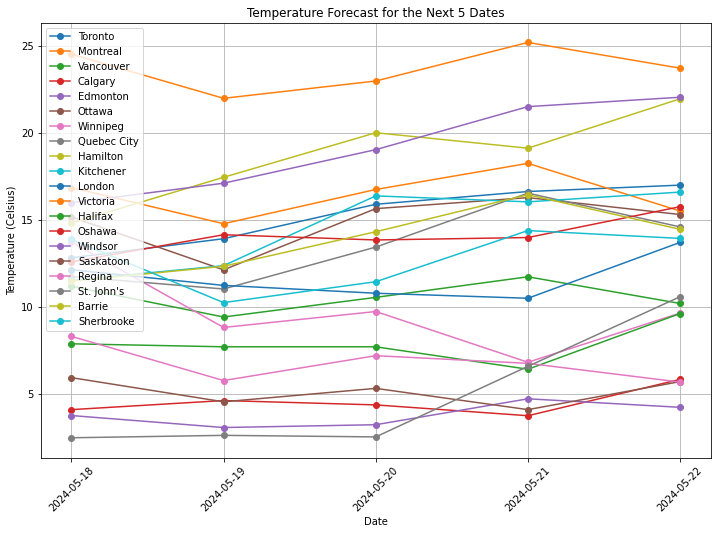

In [199]:
def plot_weather_forecast(df):
    plt.figure(figsize=(12, 8))

    for city in df['City'].unique():
        city_data = df[df['City'] == city].sort_values(by='Date').head(5)
        temperatures_celsius = [(temp - 32) * 5/9 for temp in city_data['Temperature']]

        plt.plot(city_data['Date'], temperatures_celsius,
                 marker='o', label=city)

    plt.title("Temperature Forecast for the Next 5 Dates")
    plt.xlabel('Date')
    plt.ylabel('Temperature (Celsius)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()


# Plot weather forecast for each city
plot_weather_forecast(df)




In [200]:
# Saving DataFrame to CSV file
# df['Date'] = pd.to_datetime(df['Date'])
df.to_csv('weather_forecast.csv', index=False)

# Loading CSV file back into a DataFrame
df_from_csv = pd.read_csv('weather_forecast.csv')
df_from_csv

,City,Date,Temperature,Feels Like,Description,Humidity,Wind Speed,Cloudiness,Pressure
0,Toronto,2024-05-18,55.06,54.91,scattered clouds,99,4.29,44,1011
1,Toronto,2024-05-19,57.04,57.00,broken clouds,97,0.25,57,1014
2,Toronto,2024-05-20,60.60,60.22,scattered clouds,82,2.37,46,1015
3,Toronto,2024-05-21,61.92,61.84,overcast clouds,86,2.33,100,1011
4,Toronto,2024-05-22,62.58,62.67,broken clouds,88,3.42,79,1009
...,...,...,...,...,...,...,...,...,...
95,Sherbrooke,2024-05-18,56.97,56.79,overcast clouds,94,3.15,100,1015
96,Sherbrooke,2024-05-19,50.43,49.69,clear sky,96,3.89,1,1017
97,Sherbrooke,2024-05-20,52.59,51.93,scattered clouds,93,3.94,46,1016
98,Sherbrooke,2024-05-21,57.88,57.83,broken clouds,95,4.23,84,1012


In [203]:
print("Unique city names before encoding:")
print(df['City'].unique())
print(df.columns)
# Label encode the 'City' column using .loc
label_encoder_city = LabelEncoder()
label_encoder_desc = LabelEncoder()

df['Description_encoded'] = label_encoder_desc.fit_transform(df['Description'])
df['City'] = label_encoder_city.fit_transform(df['City'])
df['Date'] = pd.to_datetime(df['Date'])
df['Date_encoded'] = df['Date'].map(lambda x: x.toordinal())

# Define feature names
feature_names = ['Temperature', 'Humidity', 'Wind Speed', 'Cloudiness', 'Pressure']

# Set feature names for X
X = df[feature_names]

y = df['Description_encoded'].values.reshape(-1, 1)


# Print unique city names after encoding
print("Unique city names after encoding:")
print(label_encoder_city.classes_)


Unique city names before encoding:
[15  7 16  1  2  9 19 10  4  5  6 17  3  8 18 12 11 14  0 13]
Index(['City', 'Date', 'Temperature', 'Feels Like', 'Description', 'Humidity',
       'Wind Speed', 'Cloudiness', 'Pressure', 'Description_encoded'],
      dtype='object')
Unique city names after encoding:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [205]:

# Model Training


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Train the random forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)


/Users/diptir/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/diptir/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/diptir/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

RandomForestClassifier()

In [206]:
# Make predictions using logistic regression and random forest models
logistic_predictions = logistic_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)

# Add predictions to the DataFrame
X_test['Logistic_Prediction'] = logistic_predictions
X_test['Random_Forest_Prediction'] = random_forest_predictions
X_test['Actual_Description'] = label_encoder_desc.inverse_transform(y_test)

# Save the DataFrame to a new CSV file
X_test.to_csv('predictions_with_actual.csv', index=False)
X_test.to_csv


/Users/diptir/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<bound method NDFrame.to_csv of     Temperature  Humidity  Wind Speed  Cloudiness  Pressure  \
83        44.15        82        4.97          97      1015   
53        50.88        77        4.54           5      1010   
70        60.75        93        2.71           1      1010   
45        52.74        97        5.41          19      1011   
44        71.51        82        7.76           0      1010   
39        58.26        99        4.43          60      1009   
22        37.80        98        8.21         100      1020   
80        46.94        69       11.72          73      1000   
10        52.12        68        8.93         100      1017   
0         55.06        99        4.29          44      1011   
18        38.73        91        4.54         100      1018   
30        56.70        96       12.75          97       997   
73        70.70        77        8.03         100      1010   
33        44.26        82        6.15          85      1017   
90        52.65        

In [208]:
import pandas as pd

# Load the old weather forecast data
df_old = pd.read_csv('weather_forecast.csv')

# Load the new predictions data
df_new = pd.read_csv('predictions_with_actual.csv')

# Rename columns in the new DataFrame to match the old DataFrame
df_new.rename(columns={'Logistic_Prediction': 'Description'}, inplace=True)

# Merge the old and new DataFrames based on their index
df_merged = pd.merge(df_old, df_new, left_index=True, right_index=True, suffixes=('_old', '_new'))
# Rename columns in the merged DataFrame
df_merged.rename(columns={
    'Temperature': 'Temperature_old',
    'Humidity': 'Humidity_old',
    'Wind Speed': 'Wind Speed_old',
    'Cloudiness': 'Cloudiness_old',
    'Pressure': 'Pressure_old'
}, inplace=True)
# Save the merged DataFrame to a new CSV file
df_merged.to_csv('merged_data.csv', index=False)

df_merged.to_csv

<bound method NDFrame.to_csv of          City        Date  Temperature_old  Feels Like   Description_old  \
0     Toronto  2024-05-18            55.06       54.91  scattered clouds   
1     Toronto  2024-05-19            57.04       57.00     broken clouds   
2     Toronto  2024-05-20            60.60       60.22  scattered clouds   
3     Toronto  2024-05-21            61.92       61.84   overcast clouds   
4     Toronto  2024-05-22            62.58       62.67     broken clouds   
5    Montreal  2024-05-18            62.33       62.02   overcast clouds   
6    Montreal  2024-05-19            58.59       58.14        few clouds   
7    Montreal  2024-05-20            62.13       61.95         clear sky   
8    Montreal  2024-05-21            64.83       64.96     broken clouds   
9    Montreal  2024-05-22            59.90       60.19     broken clouds   
10  Vancouver  2024-05-18            52.12       50.23   overcast clouds   
11  Vancouver  2024-05-19            48.94       48.94  

In [209]:
# Print the shape of input data during training
print("Training Data Shape (X):", X.shape)
print("Training Data Shape (y):", y.shape)
print("Training Data Columns:", X.columns)

Training Data Shape (X): (100, 5)
Training Data Shape (y): (100, 1)
Training Data Columns: Index(['Temperature', 'Humidity', 'Wind Speed', 'Cloudiness', 'Pressure'], dtype='object')


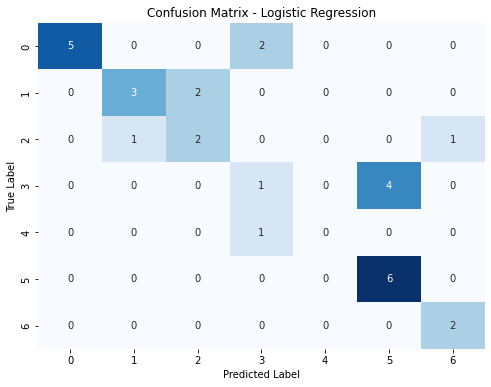

In [210]:
# Make predictions using logistic regression model
logistic_predictions = logistic_model.predict(X_test[feature_names])

# Compute confusion matrix for logistic regression model
logistic_conf_matrix = confusion_matrix(y_test, logistic_predictions)

# Plot confusion matrix for logistic regression model
plt.figure(figsize=(8, 6))
sns.heatmap(logistic_conf_matrix, annot=True,
            cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

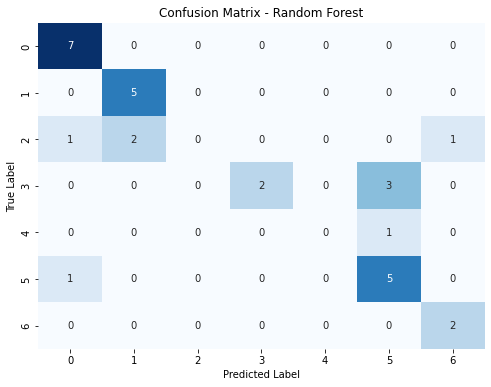

In [211]:
# Make predictions using random forest model
forest_predictions = random_forest_model.predict(X_test[feature_names])

# Compute confusion matrix for random forest model
forest_conf_matrix = confusion_matrix(y_test, forest_predictions)

# Plot confusion matrix for random forest model
plt.figure(figsize=(8, 6))
sns.heatmap(forest_conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [214]:
# # Model Saving
# joblib.dump(logistic_model, 'logistic_regression_weather_model.joblib')
# joblib.dump(random_forest_model, 'random_forest_weather_model.joblib')
import pickle

# Save the models using pickle
with open('logistic_regression_weather_model.pkl', 'wb') as file:
    pickle.dump(logistic_model, file)

with open('random_forest_weather_model.pkl', 'wb') as file:
    pickle.dump(random_forest_model, file)

In [213]:
import pickle

# Load the models using pickle
with open('logistic_regression_weather_model.pkl', 'rb') as file:
    logistic_model = pickle.load(file)

with open('random_forest_weather_model.pkl', 'rb') as file:
    random_forest_model = pickle.load(file)


In [150]:
# Make predictions using logistic regression model
logistic_predictions = logistic_model.predict(X_test[feature_names])

# Generate classification report for logistic regression model
print("Logistic Regression Model Classification Report:")
print(classification_report(y_test, logistic_predictions))

# Make predictions using random forest model
random_forest_predictions = random_forest_model.predict(X_test[feature_names])

# Generate classification report for random forest model
print("Random Forest Model Classification Report:")
print(classification_report(y_test, random_forest_predictions))

Logistic Regression Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         2
           3       0.33      0.20      0.25         5
           4       0.00      0.00      0.00         1
           5       0.82      0.90      0.86        10
           6       0.80      1.00      0.89         4

    accuracy                           0.80        30
   macro avg       0.68      0.73      0.70        30
weighted avg       0.74      0.80      0.76        30

Random Forest Model Classification Report:
              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       0.57      1.00      0.73         4
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0

/Users/diptir/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/diptir/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/diptir/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/

In [306]:
# Function to convert temperature from Fahrenheit to Celsius


def fahrenheit_to_celsius(fahrenheit):
    return (fahrenheit - 32) * 5/9

In [24]:

def create_rnn_model(input_shape):
    model = Sequential([
        LSTM(64, input_shape=input_shape),
        Dense(32, activation='relu'),
        Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    return model


# Prepare data for RNN
# Reshape input data for RNN
X_rnn = X.values.reshape((X.shape[0], 1, X.shape[1]))
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(
    X_rnn, y, test_size=0.3, random_state=42)

# Create and train the RNN model
rnn_model = create_rnn_model(input_shape=(
    X_train_rnn.shape[1], X_train_rnn.shape[2]))
early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True)
history = rnn_model.fit(X_train_rnn, y_train_rnn, epochs=100,
                        batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the RNN model
train_loss = rnn_model.evaluate(X_train_rnn, y_train_rnn)
val_loss = rnn_model.evaluate(X_test_rnn, y_test_rnn)
print(f"Training Loss: {train_loss}")
print(f"Validation Loss: {val_loss}")

Epoch 1/100
2/2 [==============================] - 3s 667ms/step - loss: 21.0625 - accuracy: 0.1071 - val_loss: 19.1905 - val_accuracy: 0.1429
Epoch 2/100
2/2 [==============================] - 0s 67ms/step - loss: 20.3439 - accuracy: 0.1071 - val_loss: 18.5120 - val_accuracy: 0.1429
Epoch 3/100
2/2 [==============================] - 0s 85ms/step - loss: 19.6390 - accuracy: 0.1071 - val_loss: 17.8463 - val_accuracy: 0.1429
Epoch 4/100
2/2 [==============================] - 0s 64ms/step - loss: 18.9672 - accuracy: 0.0893 - val_loss: 17.2339 - val_accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 68ms/step - loss: 18.3403 - accuracy: 0.0714 - val_loss: 16.6395 - val_accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 68ms/step - loss: 17.7108 - accuracy: 0.0714 - val_loss: 16.0573 - val_accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 66ms/step - loss: 17.1107 - accuracy: 0.0714 - val_loss: 15.4857 - val_accuracy: 

In [25]:
# During Evaluation Phase
train_predictions = rnn_model.predict(X_train_rnn)
train_mse = mean_squared_error(y_train_rnn, train_predictions)
print(f"Training MSE: {train_mse}")

val_predictions = rnn_model.predict(X_test_rnn)
val_mse = mean_squared_error(y_test_rnn, val_predictions)
print(f"Validation MSE: {val_mse}")


3/3 [==============================] - 0s 6ms/step
Training MSE: 4.964785729240871
1/1 [==============================] - 0s 26ms/step
Validation MSE: 6.1515438614488325


In [26]:
#Check data quality
print(df.info())
print(df.describe())

# Calculate accuracy for training set
# print("Train predictions shape:", train_predictions.shape)
# print("y_train_rnn shape:", y_train_rnn.shape)
train_predictions_flat = train_predictions.flatten()
val_predictions_flat = val_predictions.flatten()
y_test_rnn_flat = y_test_rnn.flatten()


threshold = 2  # Define the threshold for accuracy
train_accuracy = np.mean(
    np.abs(train_predictions_flat - y_train_rnn) <= threshold)

print(f"Training Accuracy: {train_accuracy}")

# Calculate accuracy for test set
val_accuracy = np.mean(
    np.abs(val_predictions_flat - y_test_rnn_flat) <= threshold)

print(f"Validation Accuracy: {val_accuracy}")




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   City                 100 non-null    int64         
 1   Date                 100 non-null    datetime64[ns]
 2   Temperature          100 non-null    float64       
 3   Feels Like           100 non-null    float64       
 4   Description          100 non-null    object        
 5   Humidity             100 non-null    int64         
 6   Wind Speed           100 non-null    float64       
 7   Cloudiness           100 non-null    int64         
 8   Pressure             100 non-null    int64         
 9   Description_encoded  100 non-null    int64         
 10  Date_encoded         100 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(6), object(1)
memory usage: 8.7+ KB
None
             City                 Date  Temperature  Feels Like    Hu

1/1 [==============================] - 0s 35ms/step


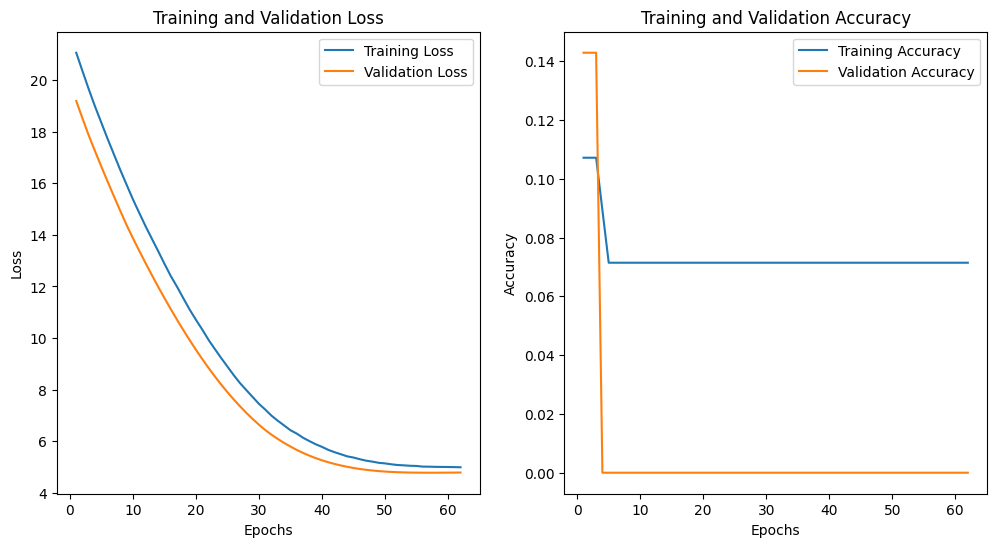

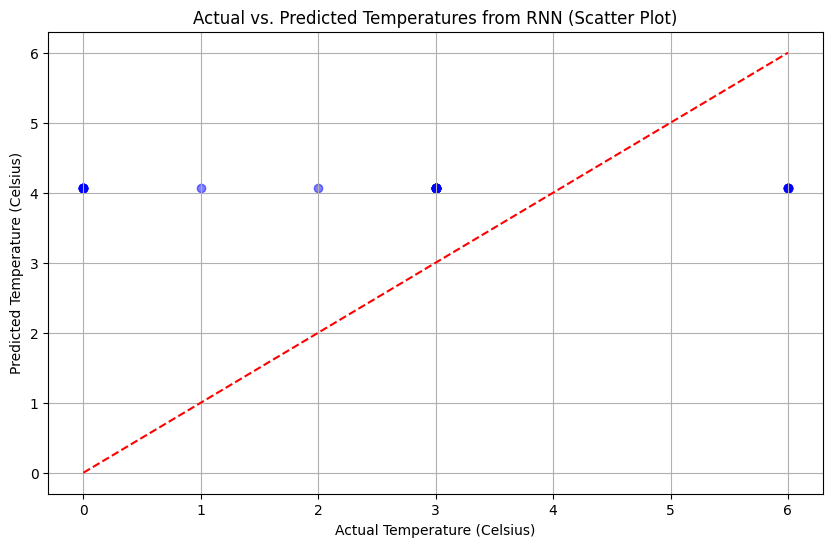

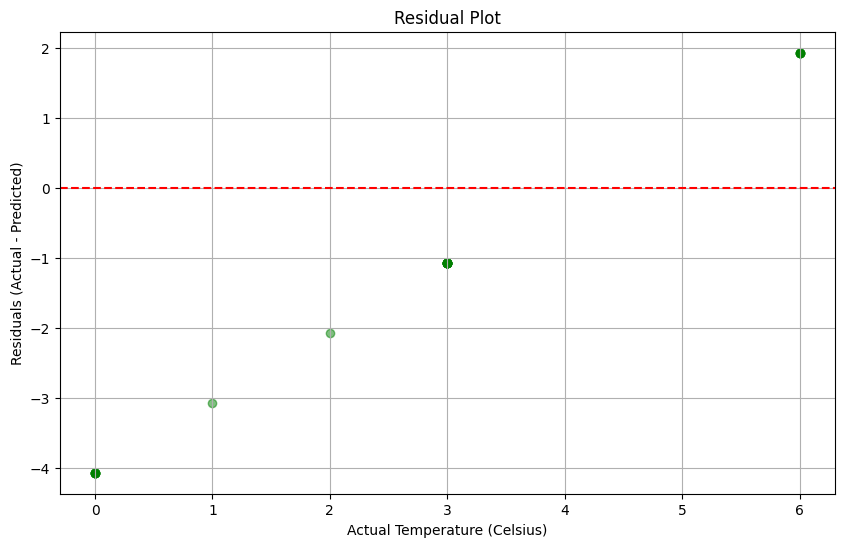

Baseline Mean Absolute Error (MAE): 1.8333333333333333
Baseline Root Mean Squared Error (RMSE): 2.183269719175042


In [27]:

# Plot the relation between losses and accuracy
plt.figure(figsize=(12, 6))
epochs = range(1, len(history.history['loss']) + 1)

plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Calculate actual and predicted temperatures for evaluation
actual_temperatures_rnn = y_test_rnn.flatten()
predicted_temperatures_rnn = rnn_model.predict(X_test_rnn).flatten()

# Calculate residuals
residuals = actual_temperatures_rnn - predicted_temperatures_rnn

# Visual Inspection: Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(actual_temperatures_rnn,
            predicted_temperatures_rnn, color='blue', alpha=0.5)
plt.plot([min(actual_temperatures_rnn), max(actual_temperatures_rnn)], [min(actual_temperatures_rnn), max(
    actual_temperatures_rnn)], color='red', linestyle='--')  # Diagonal line for reference
plt.title('Actual vs. Predicted Temperatures from RNN (Scatter Plot)')
plt.xlabel('Actual Temperature (Celsius)')
plt.ylabel('Predicted Temperature (Celsius)')
plt.grid(True)
plt.show()

# Error Analysis: Residual Plot
plt.figure(figsize=(10, 6))
plt.scatter(actual_temperatures_rnn, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.xlabel('Actual Temperature (Celsius)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()

# Model Comparison with Baseline
mean_temperature = np.mean(actual_temperatures_rnn)
baseline_predictions = np.full_like(actual_temperatures_rnn, mean_temperature)

baseline_mae = mean_absolute_error(
    actual_temperatures_rnn, baseline_predictions)
baseline_rmse = np.sqrt(mean_squared_error(
    actual_temperatures_rnn, baseline_predictions))

print(f"Baseline Mean Absolute Error (MAE): {baseline_mae}")
print(f"Baseline Root Mean Squared Error (RMSE): {baseline_rmse}")

In [28]:
import os

# Get the current working directory
current_directory = os.getcwd()
print("Current Directory:", current_directory)

# List all files and directories in the current directory
files_in_directory = os.listdir(current_directory)
print("Files in Directory:", files_in_directory)

Current Directory: /content
Files in Directory: ['.config', 'random_forest_weather_model.joblib', 'weather_forecast.csv', 'logistic_regression_weather_model.joblib', 'sample_data']
